In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab 
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [69]:
df = pd.read_csv("Car.csv")

In [70]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [72]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [73]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

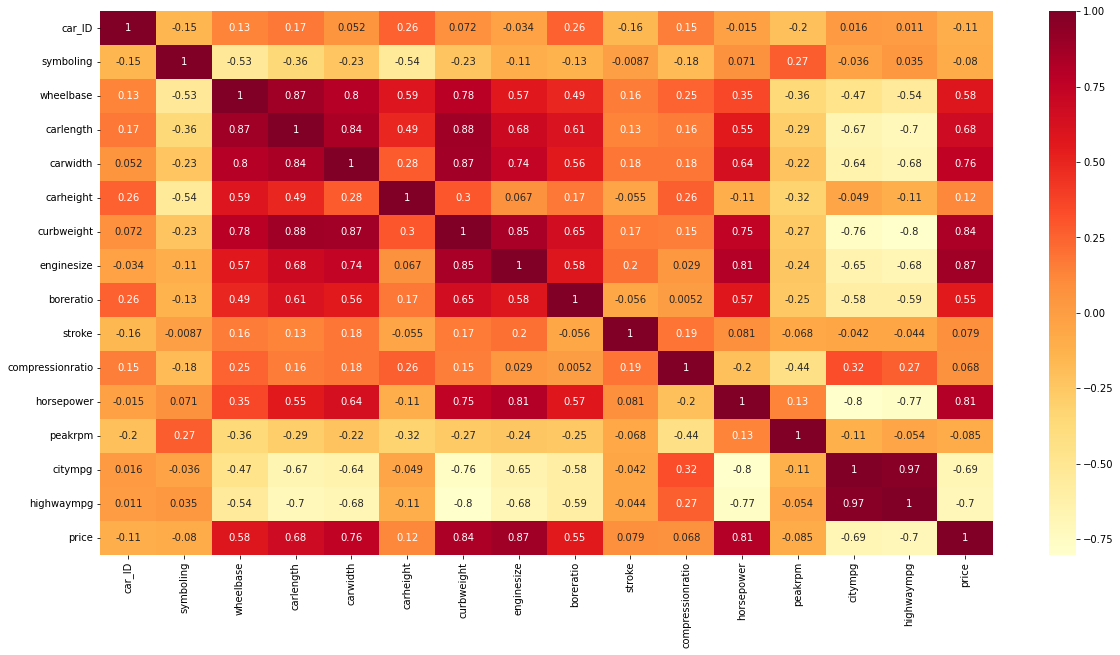

In [74]:
corr = df.corr()
indx=corr.index
plt.figure(figsize=(20,10))
sns.heatmap(df[indx].corr(),annot=True,cmap="YlOrRd")

In [75]:
df.drop(['CarName'], axis=1, inplace=True)

In [76]:
categorical_cols=[cname for cname in df.columns if df[cname].dtypes=='object']
numerical_cols=[cname for cname in df.columns if df[cname].dtypes!='object']
print('Categorical features:',categorical_cols,'\n')
print('Numerical features:',numerical_cols)

Categorical features: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 

Numerical features: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [77]:
df_data2=df.copy(deep=True)
skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_data2[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,car_ID,0.000000,0.000000,False
1,symboling,0.209525,0.209525,False
2,wheelbase,1.042514,1.042514,True
3,carlength,0.154810,0.154810,False
4,carwidth,0.897375,0.897375,True
5,carheight,0.062660,0.062660,False
6,curbweight,0.676402,0.676402,True
7,enginesize,1.933375,1.933375,True
8,boreratio,0.020009,0.020009,False
9,stroke,-0.684648,0.684648,True


In [78]:
df_data4=df_data2.copy(deep=True)
df_data_encoded = pd.get_dummies(df_data4[categorical_cols],drop_first=True)
df_data4.drop(categorical_cols,axis=1,inplace=True)
df_data4 = pd.concat([df_data4,df_data_encoded],axis=1)

df_data4.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [79]:
df_data4.drop(['peakrpm', 'citympg', 'highwaympg','boreratio','car_ID', 'symboling','compressionratio','stroke','curbweight'],axis=1,inplace=True)

In [80]:
df_data4.head()

,wheelbase,carlength,carwidth,carheight,enginesize,horsepower,price,fueltype_gas,aspiration_turbo,doornumber_two,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,130,111,13495.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,130,111,16500.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,152,154,16500.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,109,102,13950.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,136,115,17450.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
X = df_data4.loc[:, df_data4.columns!='price']
y = df_data4['price']

In [82]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (143, 35) (143,)
Test (62, 35) (62,)


In [83]:
xgb_model=XGBRegressor(n_estimators=1000, larning_rate=0.05, n_jobs=-1)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False)

[13:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "larning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             larning_rate=0.05, learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [84]:
pred=xgb_model.predict(X_valid)

In [85]:
xgb_model.score(X_train, y_train)

0.9926979517798978

In [86]:
xgb_model.score(X_valid, y_valid)

0.8867535812374703

<AxesSubplot:xlabel='price', ylabel='Density'>

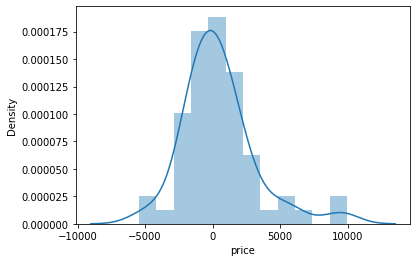

In [87]:
sns.distplot(y_valid-pred)

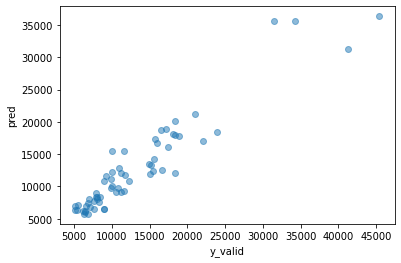

In [88]:
plt.scatter(y_valid, pred, alpha = 0.5)
plt.xlabel("y_valid")
plt.ylabel("pred")
plt.show()

In [89]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, pred))
print('MSE:', metrics.mean_squared_error(y_valid, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, pred)))

MAE: 1862.580834173387
MSE: 7478495.712448274
RMSE: 2734.683841406219


In [90]:
metrics.r2_score(y_valid, pred)

0.8867535812374703

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [92]:
print(model.feature_importances_)

[2.43031794e-02 4.51106302e-02 4.55807427e-02 1.13959629e-02
 1.83076918e-01 7.41956183e-02 3.95289470e-03 9.77781403e-03
 5.00374009e-03 4.87654179e-03 1.96404599e-02 2.44844385e-03
 5.78346929e-04 7.47482201e-03 6.54132213e-02 6.66019657e-03
 2.30066060e-03 5.51936307e-04 8.39422243e-03 7.11047657e-03
 5.22281379e-03 2.90476147e-04 6.15963817e-03 4.22259826e-01
 7.21403466e-03 5.05426990e-04 1.76854448e-04 2.56546220e-04
 7.79317796e-03 4.14783089e-04 3.85432978e-03 3.26904553e-05
 1.75731791e-02 3.32444341e-04 6.69499849e-05]


In [93]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances

wheelbase                0.024303
carlength                0.045111
carwidth                 0.045581
carheight                0.011396
enginesize               0.183077
horsepower               0.074196
fueltype_gas             0.003953
aspiration_turbo         0.009778
doornumber_two           0.005004
carbody_hardtop          0.004877
carbody_hatchback        0.019640
carbody_sedan            0.002448
carbody_wagon            0.000578
drivewheel_fwd           0.007475
drivewheel_rwd           0.065413
enginelocation_rear      0.006660
enginetype_dohcv         0.002301
enginetype_l             0.000552
enginetype_ohc           0.008394
enginetype_ohcf          0.007110
enginetype_ohcv          0.005223
enginetype_rotor         0.000290
cylindernumber_five      0.006160
cylindernumber_four      0.422260
cylindernumber_six       0.007214
cylindernumber_three     0.000505
cylindernumber_twelve    0.000177
cylindernumber_two       0.000257
fuelsystem_2bbl          0.007793
fuelsystem_4bb

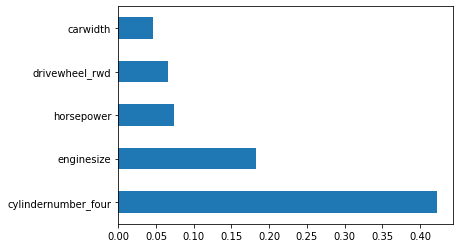

In [94]:
feat_importances.nlargest(n=5).plot(kind = 'barh')
plt.show()


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [97]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num  = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
random_grid = {'n_estimators':n_estimators,
'max_features' :max_features,
'max_depth' :max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf' :min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [100]:
rf = RandomForestRegressor()

In [101]:
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
predictions = rf_random.predict(X_test)

In [103]:
predictions

array([ 6228.455     , 14622.02      ,  6379.875     , 10324.55      ,
       16400.74      , 18331.82333333,  6328.94452381,  6584.3125    ,
       16972.83190476,  6401.95      , 14024.91333333, 13997.48      ,
        9351.71      ,  8505.74833333,  6319.97666667,  9910.82595238,
        7120.95      ,  7148.57833333, 34975.57      ,  9649.49      ,
        7565.2925    ,  6705.25166667, 18220.36      ,  6118.44333333,
        9760.27      , 32260.405     , 14771.39666667,  7040.95666667,
        9235.85833333,  9389.2725    ,  7044.78333333,  7794.09190476,
       28269.215     , 16604.78333333, 17512.67666667, 35086.13      ,
       13693.28666667, 13997.48      ,  7883.70666667, 32079.535     ,
       10841.37928571, 26395.94      , 16972.83190476, 10784.15      ,
        7694.20333333, 16144.64166667, 14074.965     , 16639.915     ,
        6559.35583333,  5903.90952381, 32446.12      , 19737.03833333,
       32614.885     ,  7393.85083333,  6118.44333333, 14748.36666667,
      

<AxesSubplot:xlabel='price', ylabel='Density'>

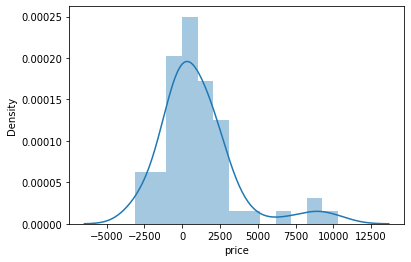

In [104]:
sns.distplot(y_test-predictions)

<AxesSubplot:xlabel='price'>

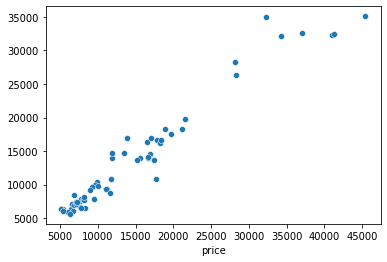

In [105]:
sns.scatterplot(y_test,predictions)

In [106]:
metrics.r2_score(y_test, predictions)

0.9203885115741641